/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Data/psf.py:95: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:160: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/var/folders/74/9yc0dt9d53z15d2qpmgpxv4h0000gn/T/ipykernel_58356/2961501858.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f_main.show()
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:1111: RuntimeWarning: divide by zero encountered in log10
  np.log10(model),


-1.0196060273704444 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0196060273704435


/var/folders/74/9yc0dt9d53z15d2qpmgpxv4h0000gn/T/ipykernel_58356/2961501858.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f_sep.show()
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:1168: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data - model),
/var/folders/74/9yc0dt9d53z15d2qpmgpxv4h0000gn/T/ipykernel_58356/2961501858.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f_res.show()


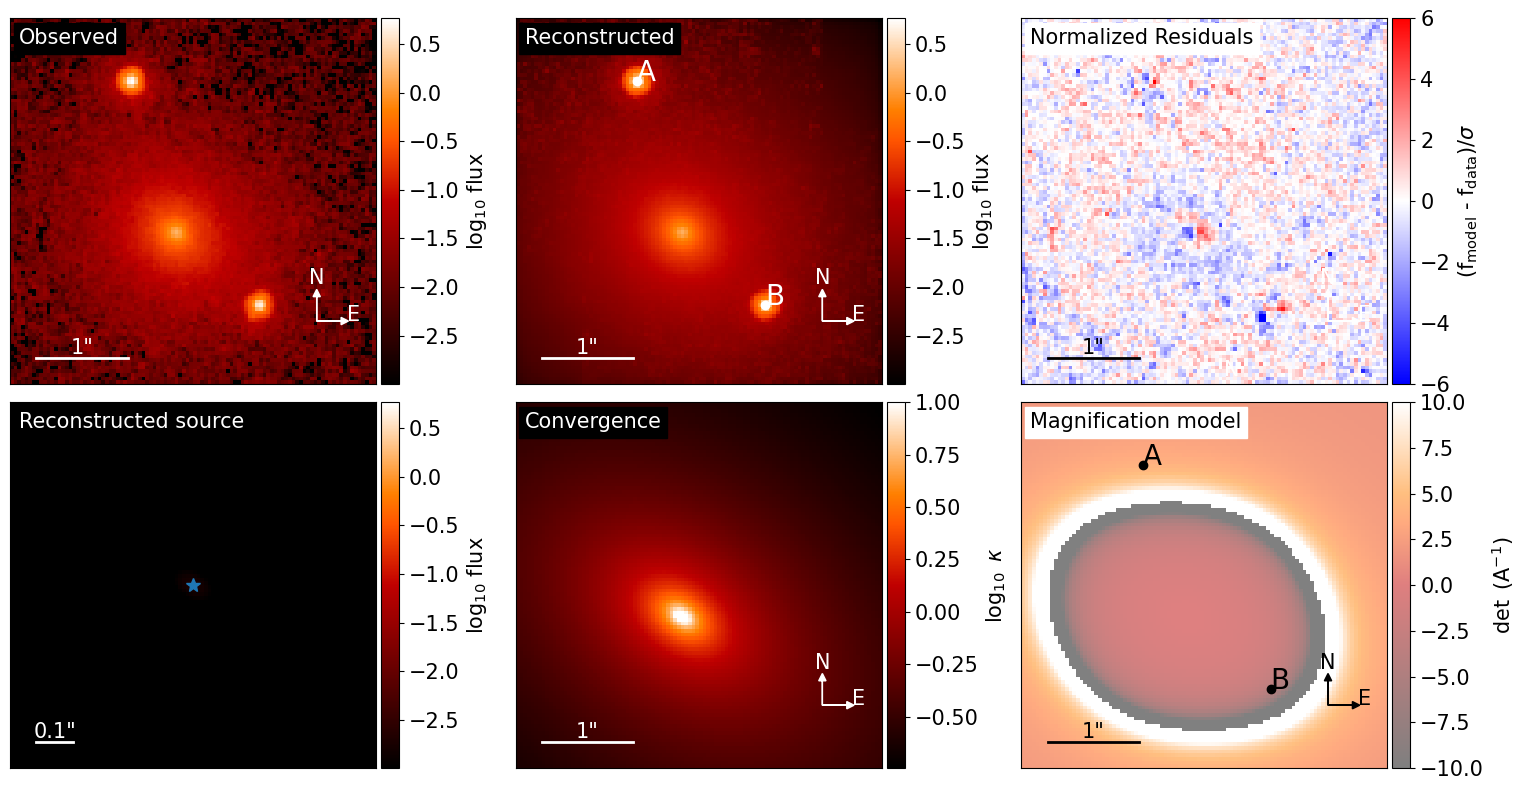

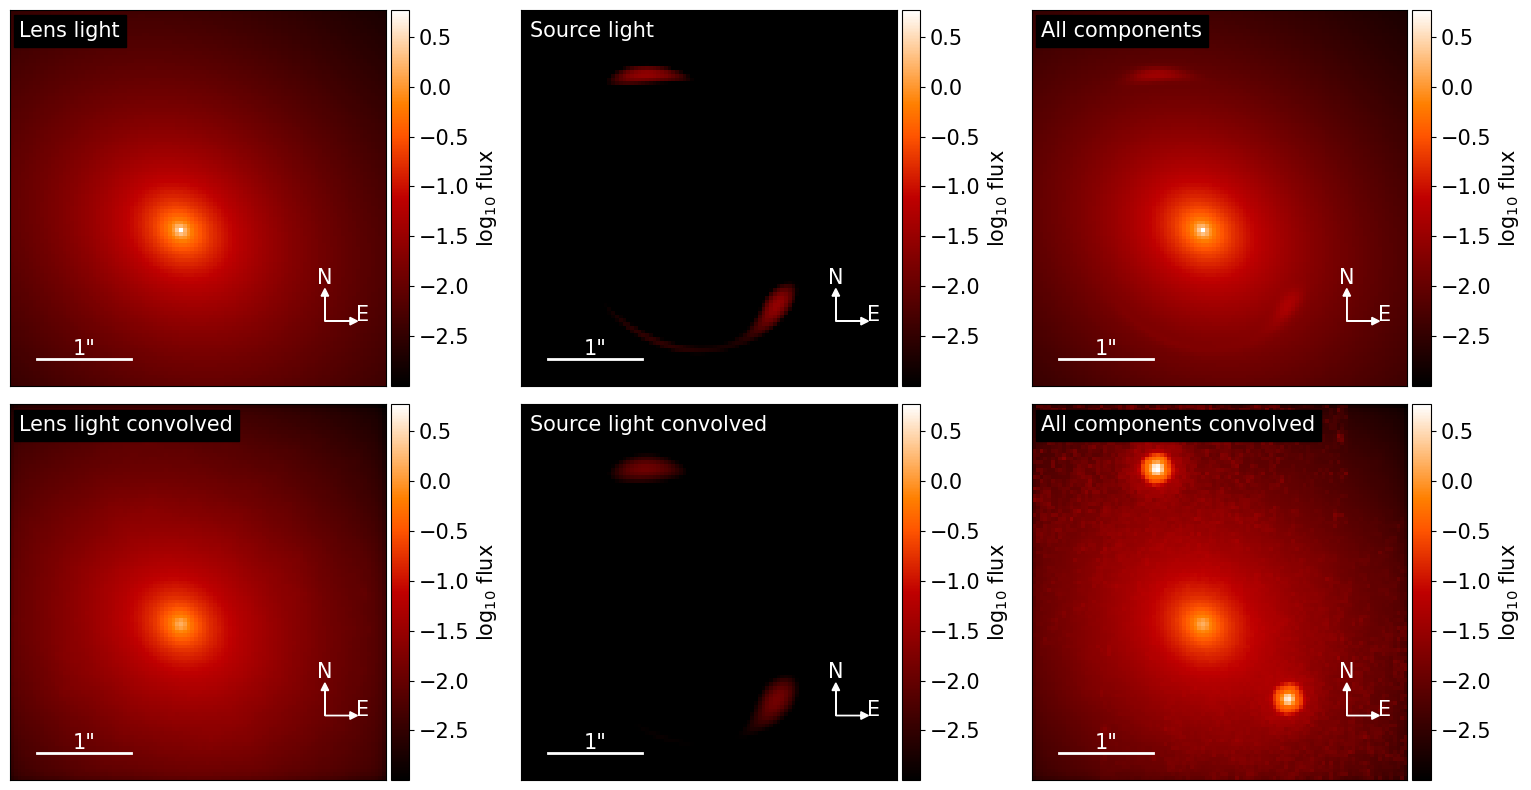

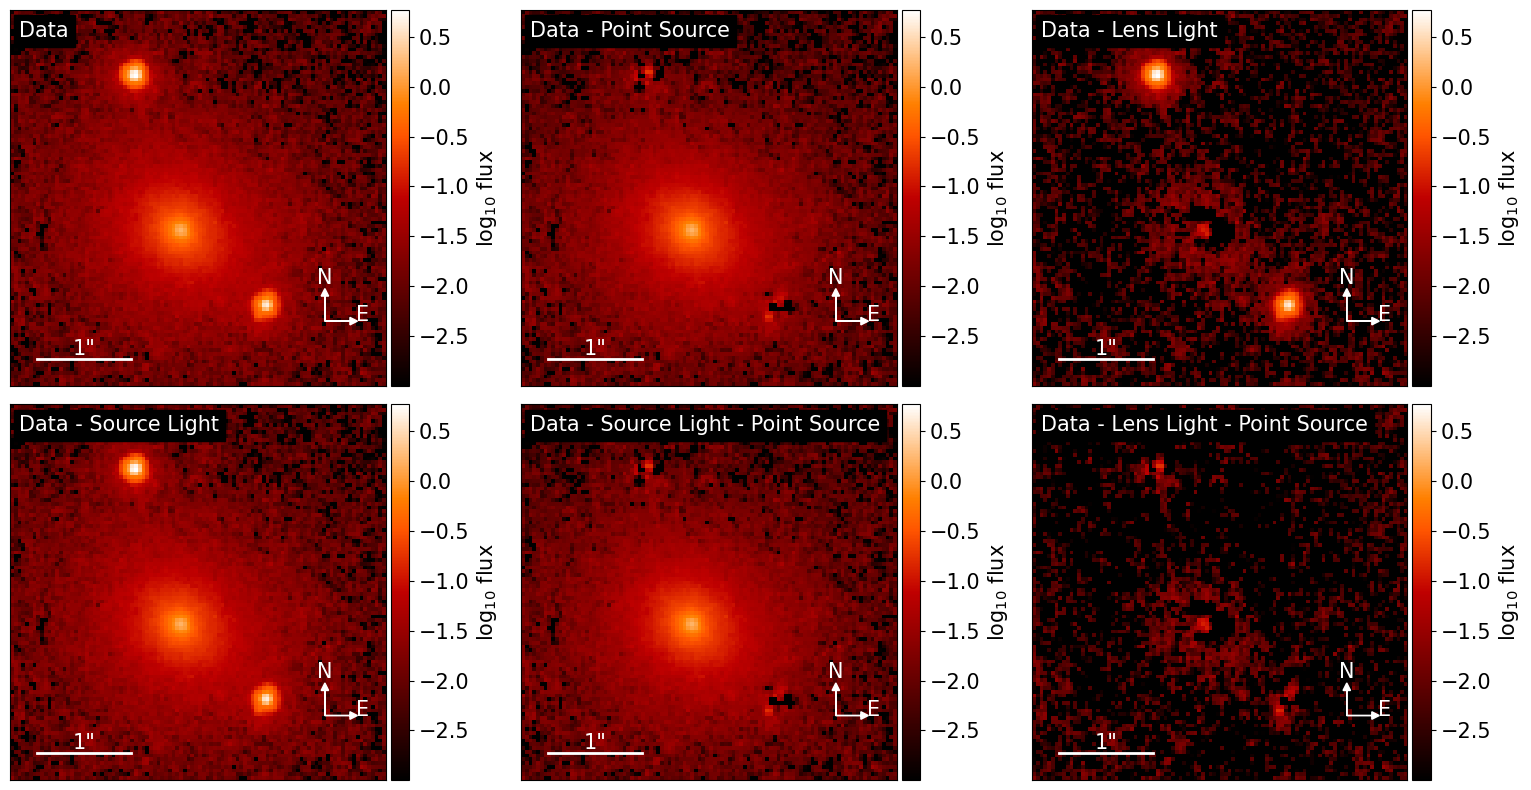

In [13]:
# example loading in model data and looking at 
# some diagnostics

import pickle
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
from lenstronomy.Workflow.fitting_sequence import FittingSequence
import h5py
import corner
import numpy as np

name = "J2325-5229"
filter = "F814W"
filename = f"../cutout_data/{name}/{filter}/{name}_{filter}.pkl"

# load the saved data and plot the models
with open(filename, "rb") as f:
    loaded_data = pickle.load(f)

kwargs_result = loaded_data["kwargs_result"]
multi_band_list = loaded_data["multi_band_list"]
kwargs_model = loaded_data["kwargs_model"]
kwargs_params = loaded_data.get("kwargs_params", None)
chain_list = loaded_data.get('chain_list')
kwargs_constraints = loaded_data.get("kwargs_constraints", None)
kwargs_likelihood = loaded_data.get("kwargs_likelihood", None)
kwargs_data_joint = loaded_data.get("kwargs_data_joint", None)

modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="gist_heat")

f_main, axes_main = modelPlot.plot_main()
f_main.show()

f_sep, axes_sep = modelPlot.plot_separate()
f_sep.show()

f_res, axes_res = modelPlot.plot_subtract_from_data_all()
f_res.show()

Image AB Magnitudes: [20.68341555 21.08832574]
Lens AB Magnitude: 19.092675562654563


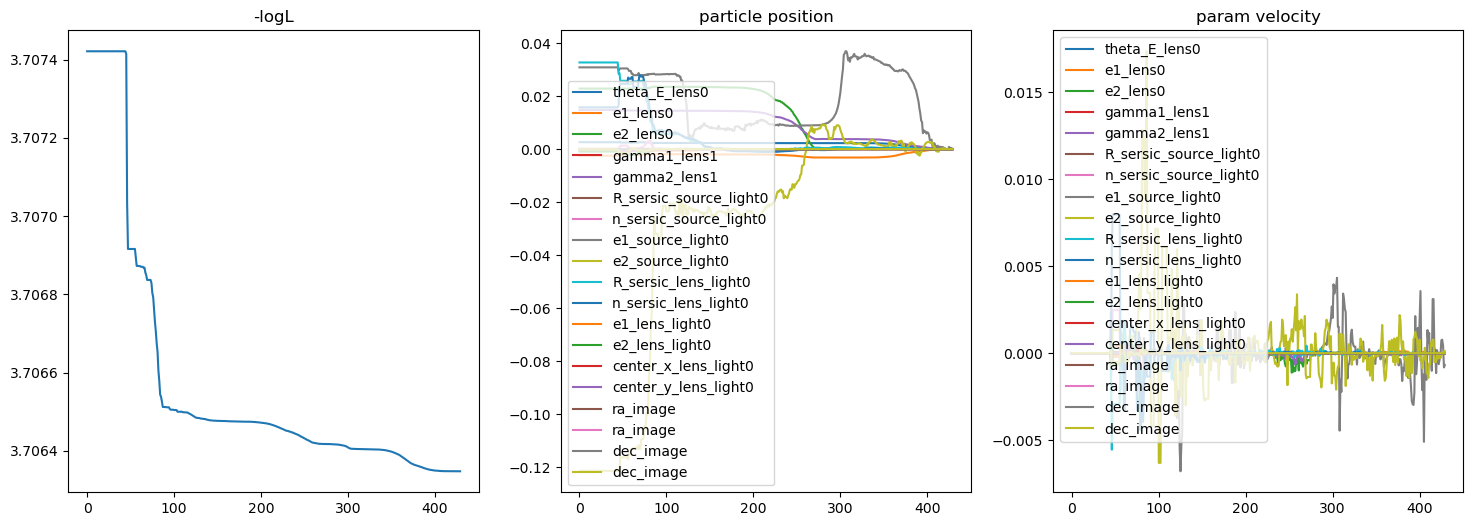

<Figure size 640x480 with 0 Axes>

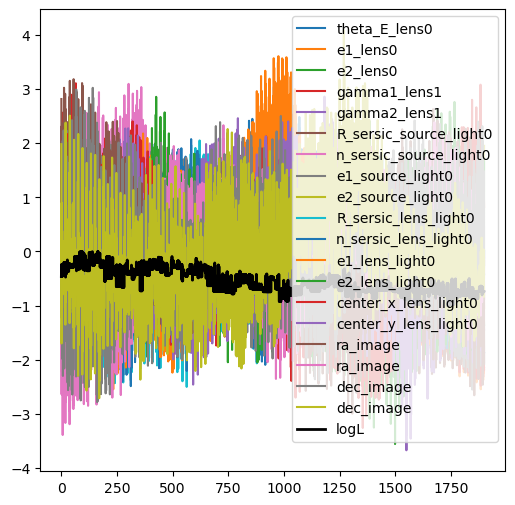

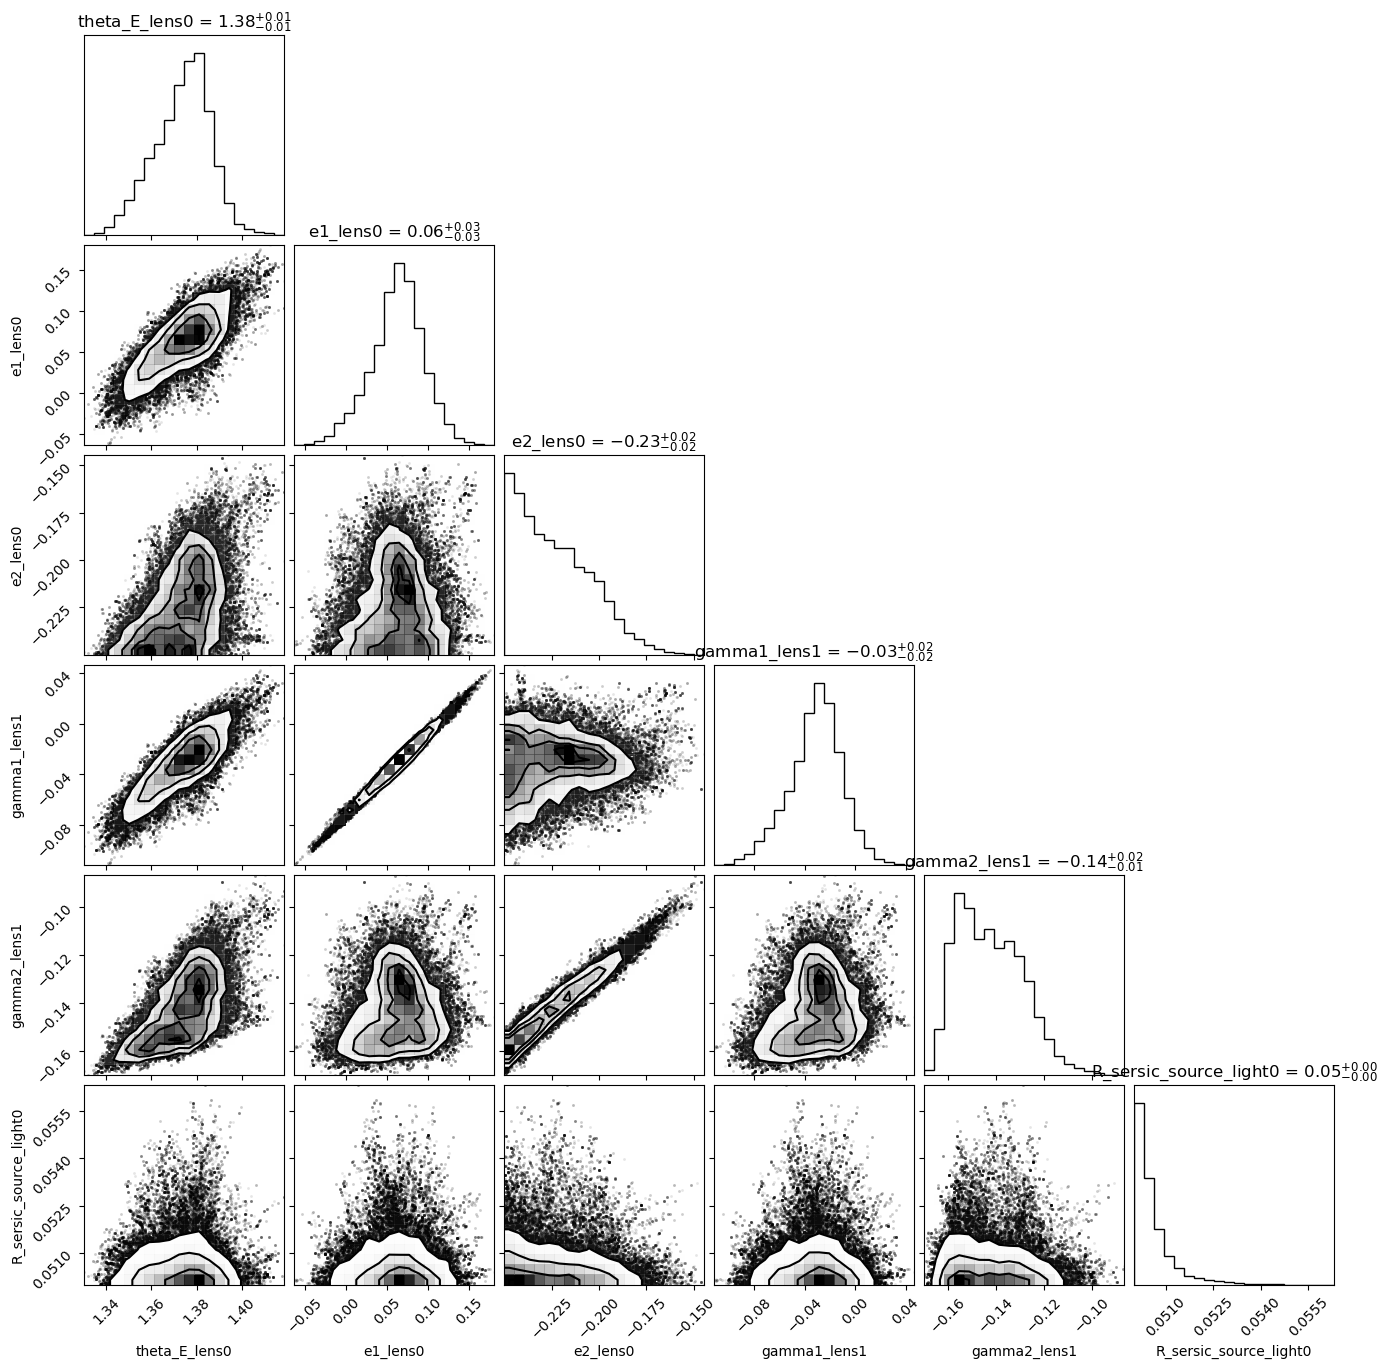

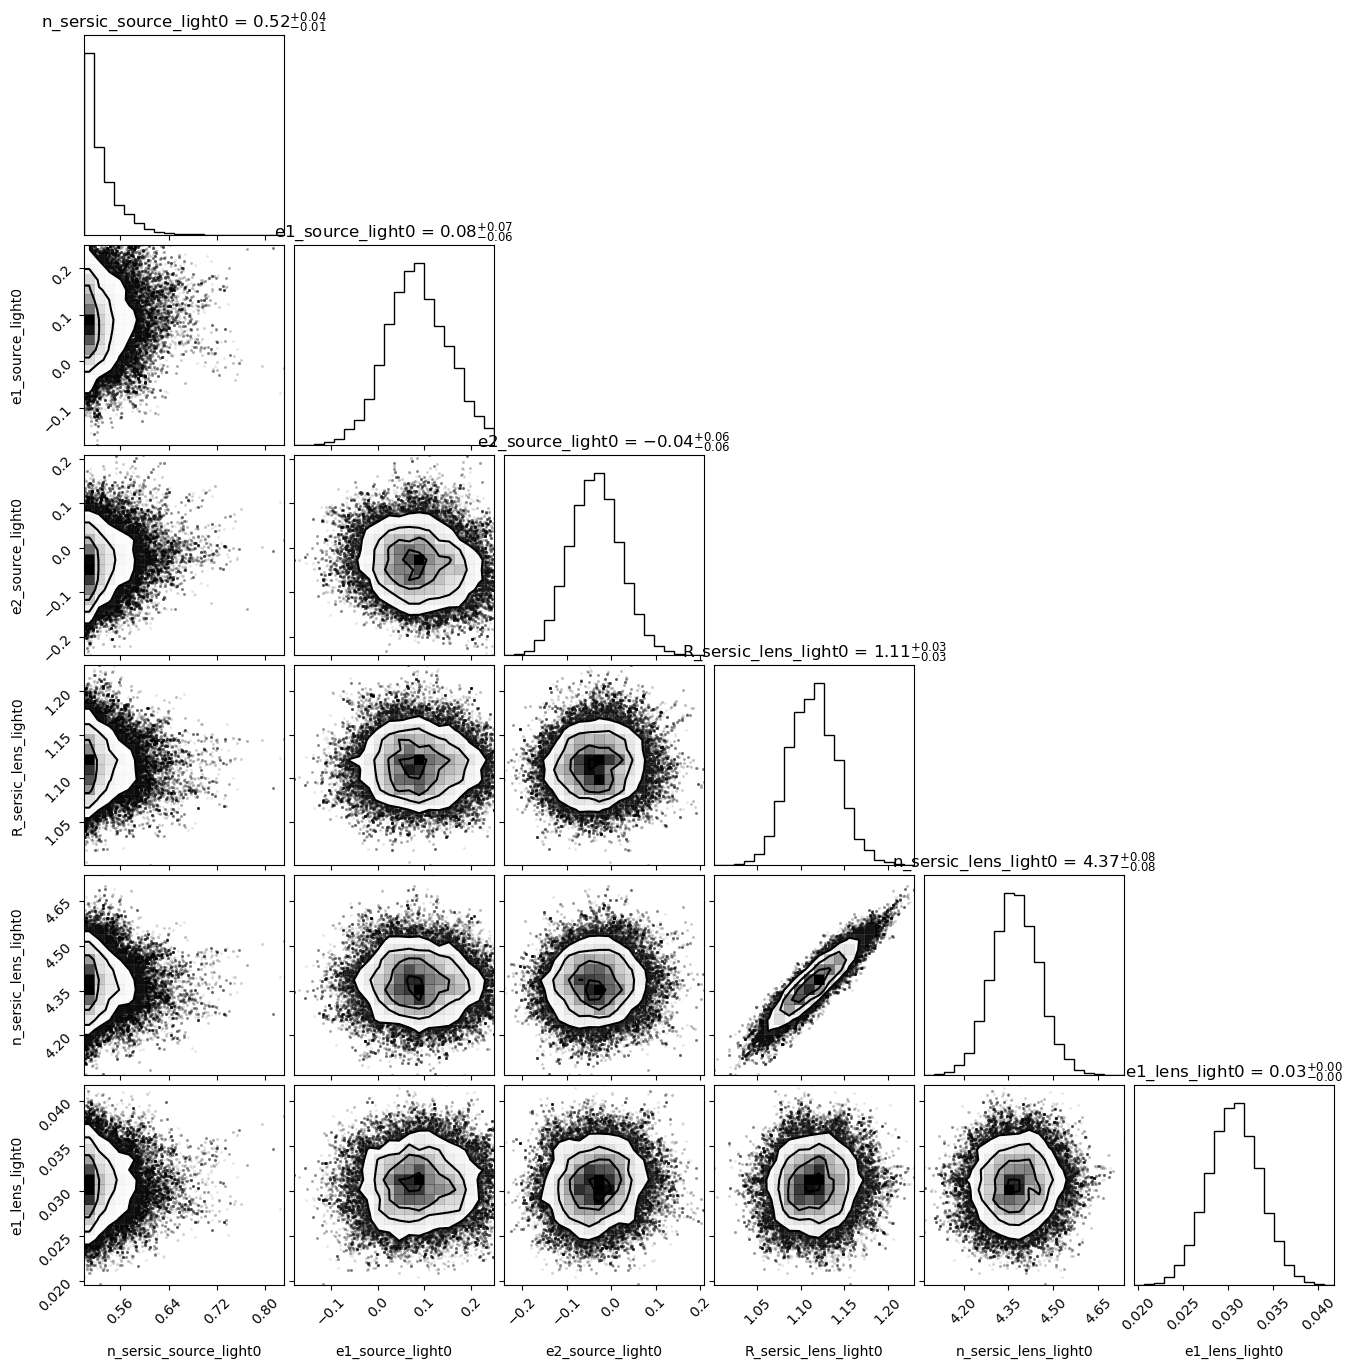

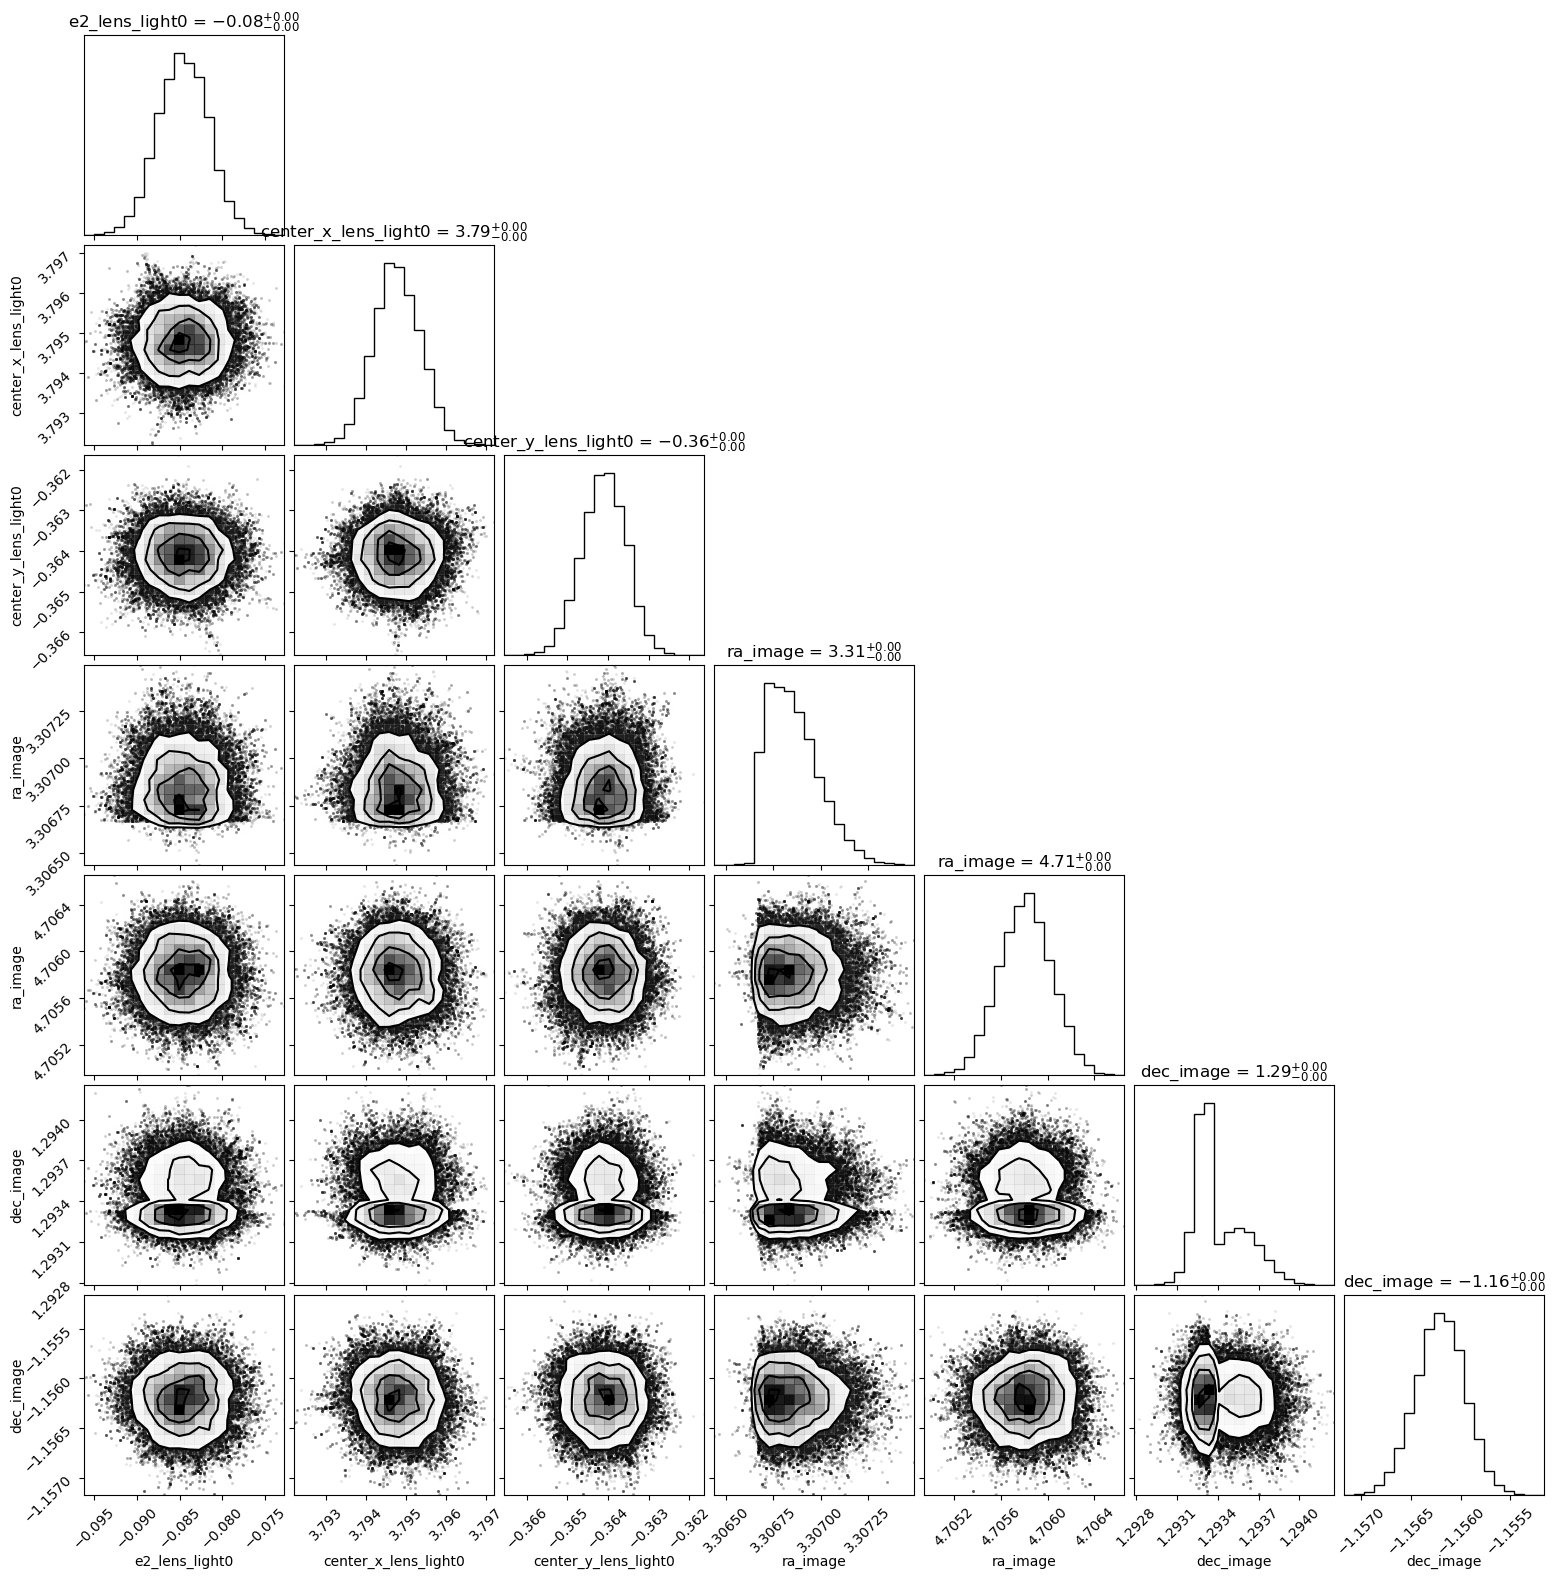

In [14]:
fitting_seq = FittingSequence(kwargs_data_joint, kwargs_model, kwargs_constraints, kwargs_likelihood, kwargs_params)

filename = f"../cutout_data/{name}/{filter}/{name}_{filter}_final.hdf5"

# print some of the final results
with h5py.File(filename, "r") as f:
    kwargs = {}
    for key in f:
        kwargs[key] = f[key][()]

print('Image AB Magnitudes:', kwargs['image_mags'])
print('Lens AB Magnitude:', kwargs['lens_mag'])

# analyze the PSO and MCMC
param = fitting_seq.param_class

for i in range(len(chain_list)):
    chain_plot.plot_chain_list(chain_list, i)

sampler_type, samples_mcmc, param_mcmc, dist_mcmc  = chain_list[1]

if samples_mcmc.size != 0:
    n, num_param = np.shape(samples_mcmc)
    plot = corner.corner(samples_mcmc[:, :6], labels=param_mcmc[:6], show_titles=True)
    plot = corner.corner(samples_mcmc[:, 6:12], labels=param_mcmc[6:12], show_titles=True)
    plot = corner.corner(samples_mcmc[:, 12:19], labels=param_mcmc[12:19], show_titles=True)

-1.228678313183614 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.2286783131836143
-1.0591361002463537 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0591361002463542
-1.262809620248046 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.2628096202480465


/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:160: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Data/psf.py:95: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:67: RuntimeWarning: invalid value encountered in log10
  log_model = np.log10(model)
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:224: RuntimeWarning: invalid value encountered in log10
  np.log10(self._model),


-1.4476526850001596 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.4476526850001599
-1.0827132505678423 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.082713250567842
-1.0196060273704444 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0196060273704435


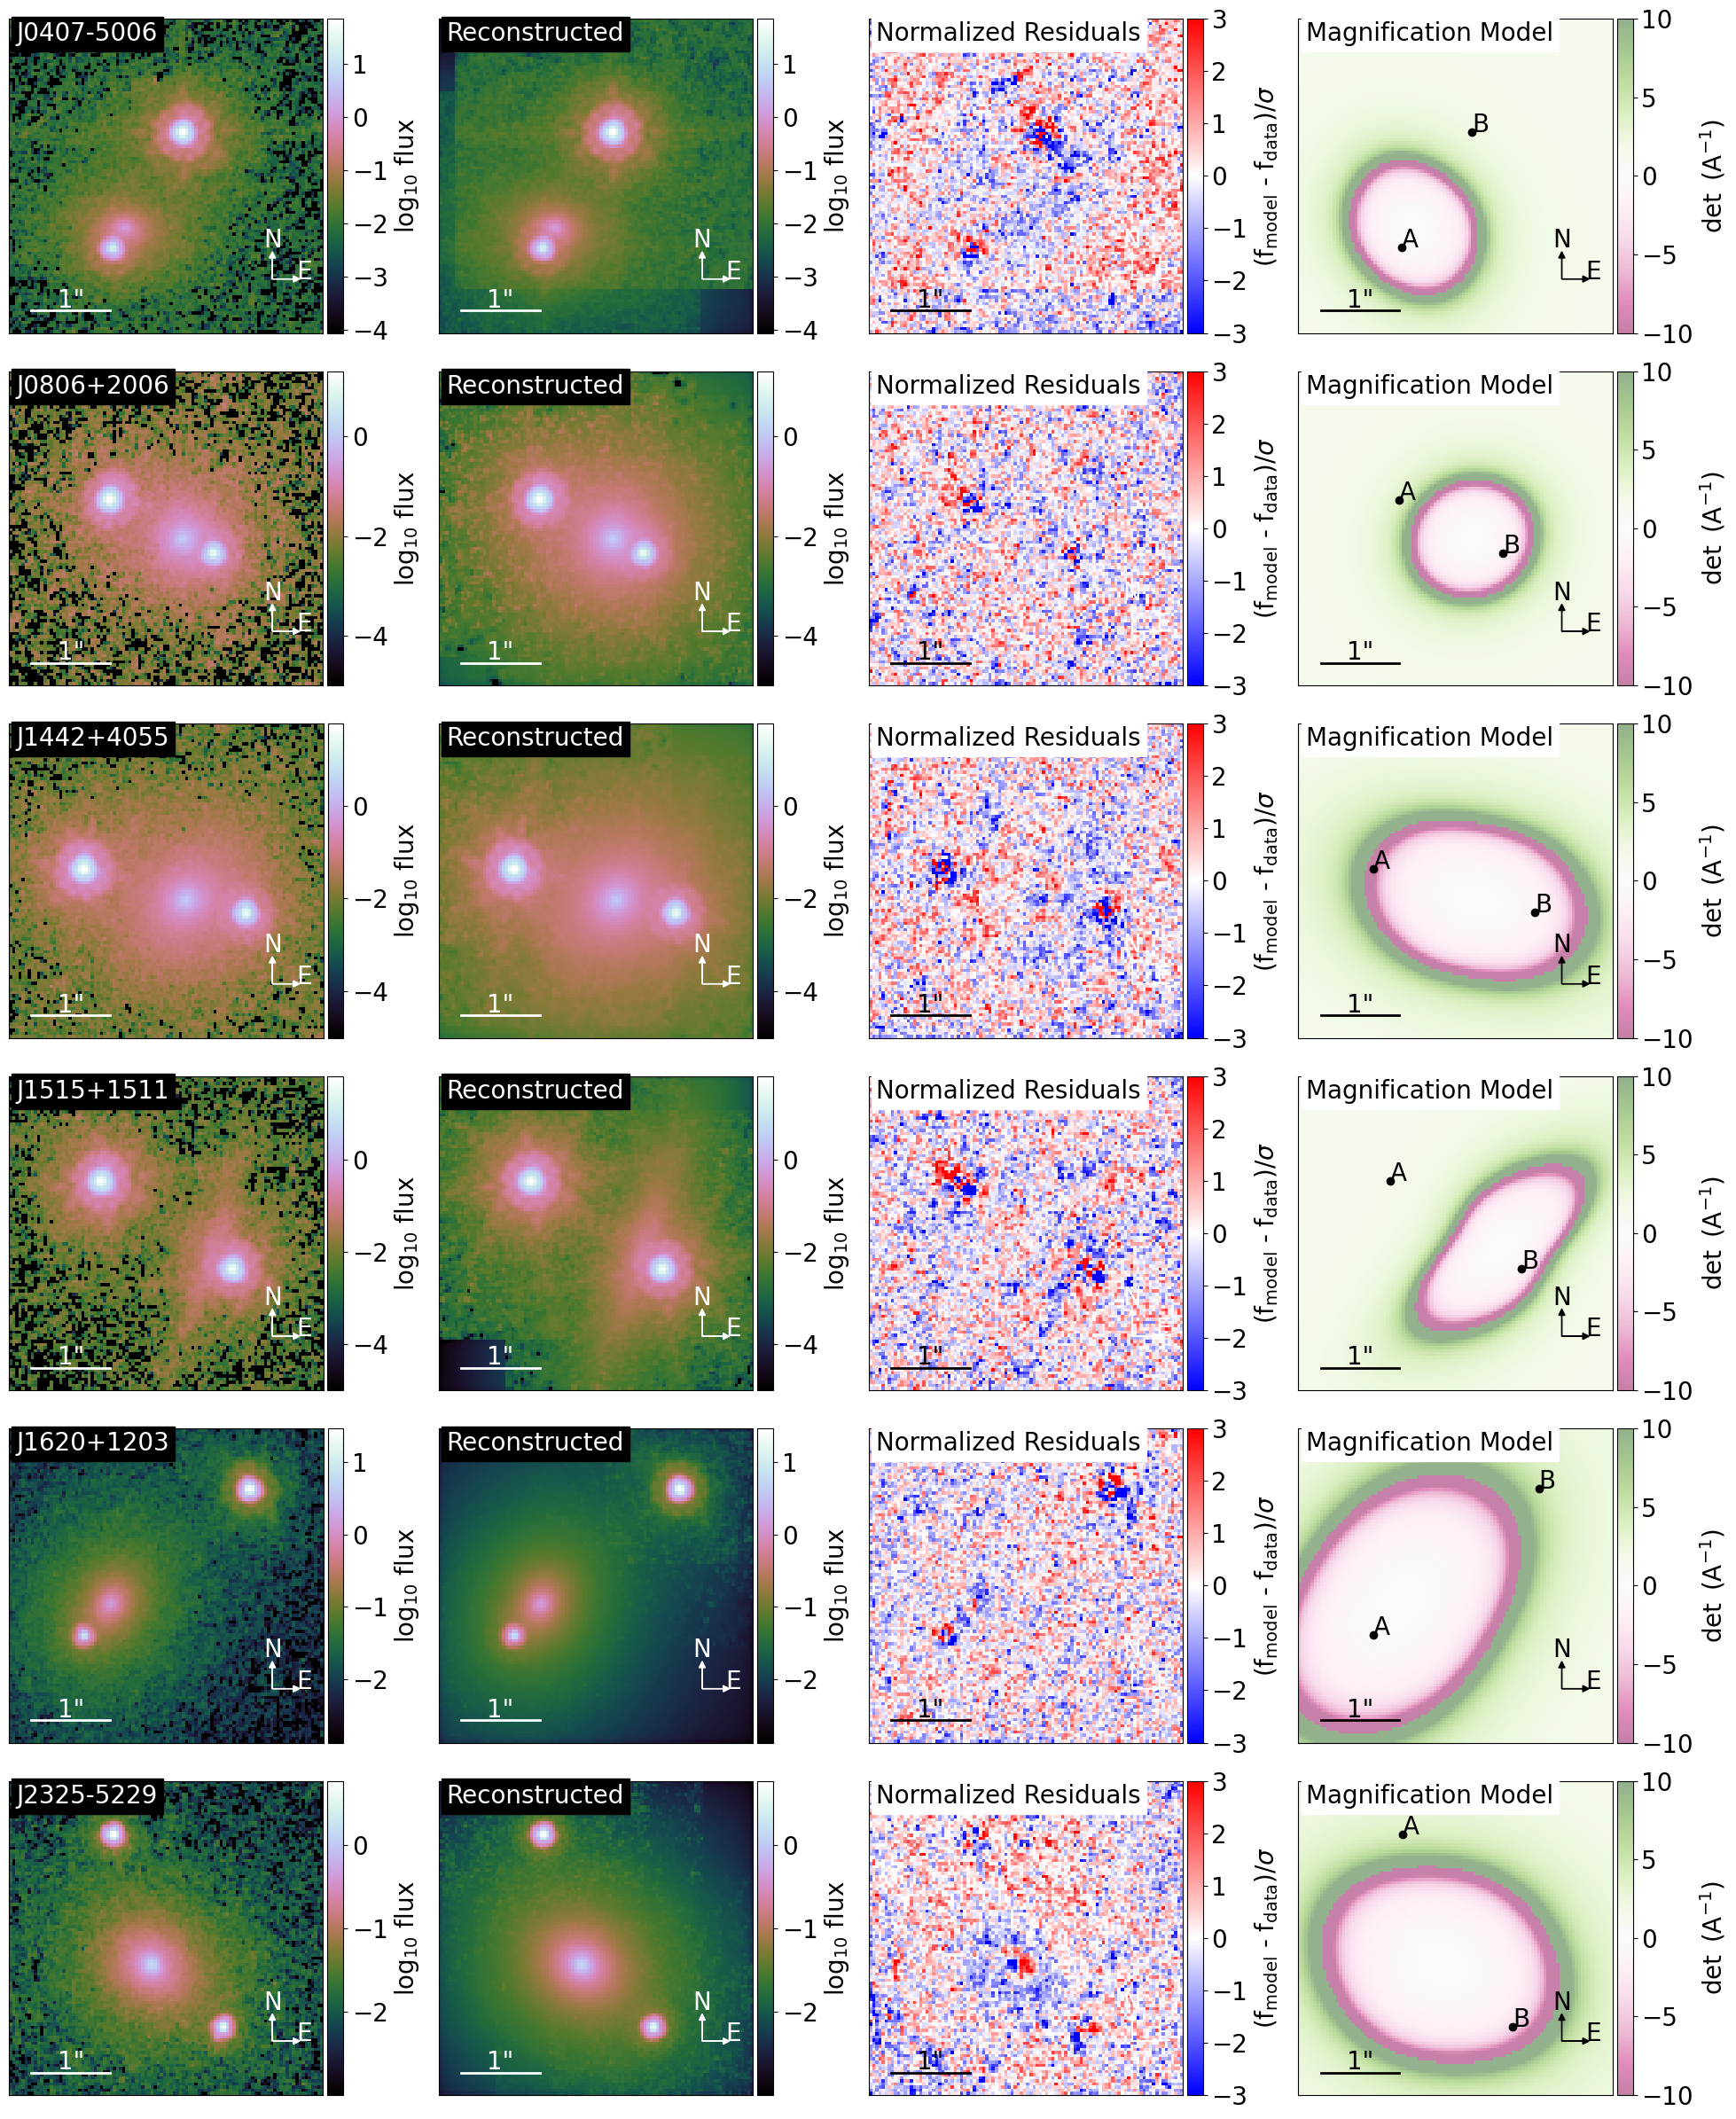

In [1]:
import pickle
import matplotlib.pyplot as plt
from lenstronomy.Plots.model_plot import ModelPlot

# define filters and system name
names = ['J0407-5006', 'J0806+2006', 'J1442+4055', 'J1515+1511', 'J1620+1203', 'J2325-5229']
filter = 'F814W'
fontsize = 20

nrows = len(names)
fig, axes = plt.subplots(nrows, 4, figsize=(20, 24))

for i, name in enumerate(names):
    filename = f"../cutout_data/{name}/{filter}/{name}_{filter}.pkl"

    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)

    kwargs_result = loaded_data["kwargs_result"]
    multi_band_list = loaded_data["multi_band_list"]
    kwargs_model = loaded_data["kwargs_model"]

    # initialize model plot
    modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="cubehelix")

    # plot data image
    modelPlot.data_plot(ax=axes[i, 0],text=f'{name}',font_size=fontsize)

    # plot model image
    modelPlot.model_plot(ax=axes[i, 1],font_size=fontsize)

    # plot residuals
    modelPlot.normalized_residual_plot(ax=axes[i, 2],v_min=-3,v_max=3,font_size=fontsize)

    # plot magnification model
    modelPlot.magnification_plot(ax=axes[i, 3],text='Magnification Model', font_size=fontsize, cmap='PiYG')

plt.tight_layout()
plt.show()